#SENTIMENT ANALYSIS AND TEXT ANALYZER
This is the **Sentiment Analysis & Text Analyzer** project.

This notebook allows you to upload any text file and get insightful NLP analysis.

##  Features:
- Upload a `.txt` file
- Clean and process the text
- Sentence segmentation
- Named Entity Recognition (NER)
- Sentiment analysis using VADER
- Word frequency analysis
- Word Cloud and Bar Chart visualizations
- Offensive language and spam detection (basic)
- Text summarization using spaCy

## Step 1: Install Required Libraries

In [1]:
!pip install nltk spacy wordcloud matplotlib
!python -m nltk.downloader vader_lexicon
!python -m spacy download en_core_web_sm

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 92.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Step 2: Import Libraries

In [2]:
import nltk
import spacy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import re
from google.colab import files


###Load NLP model and sentiment analyzer

In [3]:
nlp = spacy.load("en_core_web_sm")
sia = SentimentIntensityAnalyzer()

## Step 3: Upload and Read a Text File

In [5]:
uploaded = files.upload()

filename = next(iter(uploaded))
with open(filename, 'r', encoding='utf-8') as file:
    text = file.read()


Saving customer_reviews_sample.txt to customer_reviews_sample.txt


## Step 4: Clean the Text

In [7]:
cleaned_text = re.sub(r"[^a-zA-Z\s]", "", text)
print("\n--- Cleaned Text ---\n")
print(cleaned_text)


--- Cleaned Text ---


I love this product It has changed my life for the better Highly recommended to anyone
However the shipping was terribly slow and the packaging was damaged
Customer service was polite but not very helpful
Ill definitely buy again but I hope the delivery improves next time
Click here for a discount  free money for all subscribers
Stupid delays like this shouldnt happen This company needs to get their act together



## Step 5: Sentence Segmentation

In [8]:
print("\n--- Sentence Segmentation ---\n")
doc = nlp(text)
sentences = list(doc.sents)
for i, sent in enumerate(sentences[:5]):
    print(f"Sentence {i+1}: {sent.text.strip()}")


--- Sentence Segmentation ---

Sentence 1: I love this product!
Sentence 2: It has changed my life for the better.
Sentence 3: Highly recommended to anyone.
Sentence 4: However, the shipping was terribly slow, and the packaging was damaged.
Sentence 5: Customer service was polite but not very helpful.


## Step 6: Named Entity Recognition

In [9]:
print("\n--- Named Entities ---\n")
for ent in doc.ents:
    print(f"{ent.text} ({ent.label_})")


--- Named Entities ---

Stupid (ORG)


## Step 7: Sentiment Analysis (VADER)

In [10]:
print("\n--- Sentiment Analysis ---\n")
sentiment_scores = sia.polarity_scores(text)
for k, v in sentiment_scores.items():
    print(f"{k.capitalize()}: {v}")


--- Sentiment Analysis ---

Neg: 0.129
Neu: 0.595
Pos: 0.275
Compound: 0.9287


## Step 8: Word Frequency Analysis

In [11]:
words = cleaned_text.lower().split()
word_freq = Counter(words)
most_common_words = word_freq.most_common(10)

print("\n--- Top 10 Words ---\n")
for word, freq in most_common_words:
    print(f"{word}: {freq}")


--- Top 10 Words ---

the: 4
this: 3
for: 3
was: 3
i: 2
to: 2
but: 2
love: 1
product: 1
it: 1


## Step 9: Word Cloud Visualization

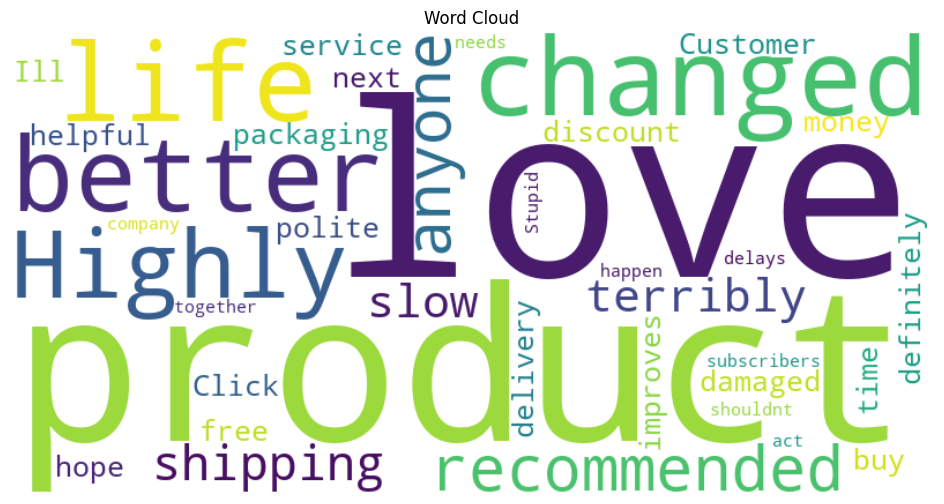

In [12]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud")
plt.show()

## Step 10: Bar Chart for Word Frequency

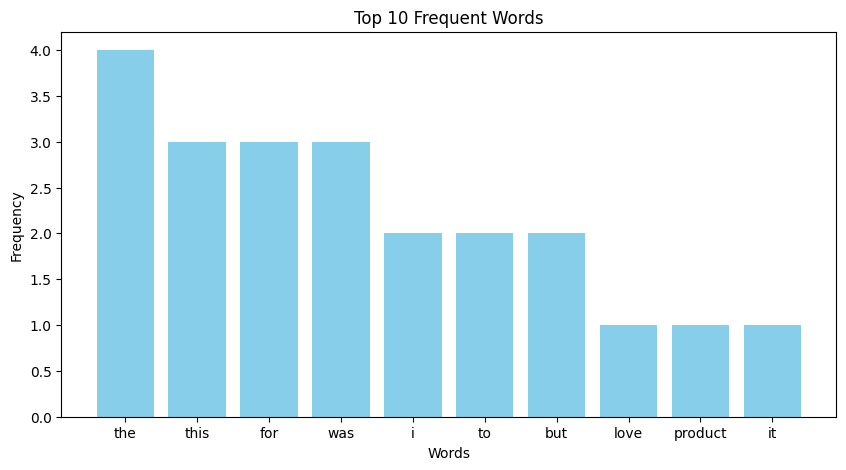

In [13]:
labels, values = zip(*most_common_words)
plt.figure(figsize=(10, 5))
plt.bar(labels, values, color='skyblue')
plt.title("Top 10 Frequent Words")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()


## Step 11: Offensive Language & Spam Detection

In [14]:
print("\n--- Offensive Language Detection ---\n")
offensive_words = ["hate", "idiot", "stupid", "dumb", "kill"]
found = [word for word in words if word in offensive_words]
if found:
    print("Offensive words found:", set(found))
else:
    print("No major offensive words detected.")

print("\n--- Spam Indicator ---\n")
spammy_phrases = ["buy now", "click here", "subscribe", "free money"]
spam_detected = any(phrase in text.lower() for phrase in spammy_phrases)
print("Spammy language detected." if spam_detected else "No spam-like language detected.")



--- Offensive Language Detection ---

Offensive words found: {'stupid'}

--- Spam Indicator ---

Spammy language detected.


## Step 12: Text Summarization (SpaCy-based)

In [15]:
print("\n--- Text Summary ---\n")
summary_sentences = sorted(sentences, key=lambda s: len(s), reverse=True)[:3]
summary = " ".join([s.text.strip() for s in summary_sentences])
print(summary)


--- Text Summary ---

I'll definitely buy again, but I hope the delivery improves next time. However, the shipping was terribly slow, and the packaging was damaged. Click here for a discount – free money for all subscribers!
